In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows',1000)

In [2]:
#Read in merged paint data file
df = pd.read_csv('Paint_Data_Merged.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(30)

metric  value                 time  is_prod  count
0   E_C100  390.0  2022-04-15 00:00:00      0.0    0.0
1   E_C100  120.0  2022-04-15 01:00:00      0.0    0.0
2   E_C100  120.0  2022-04-15 02:00:00      0.0    0.0
3   E_C100  120.0  2022-04-15 03:00:00      0.0    0.0
4   E_C100  110.0  2022-04-15 04:00:00      0.0    0.0
5   E_C100  110.0  2022-04-15 05:00:00      0.0    0.0
6   E_C100  100.0  2022-04-15 06:00:00      0.0    0.0
7   E_C100  110.0  2022-04-15 07:00:00      0.0    0.0
8   E_C100  110.0  2022-04-15 08:00:00      0.0    0.0
9   E_C100  110.0  2022-04-15 09:00:00      0.0    0.0
10  E_C100  110.0  2022-04-15 10:00:00      0.0    0.0
11  E_C100  110.0  2022-04-15 11:00:00      0.0    0.0
12  E_C100  120.0  2022-04-15 12:00:00      0.0    0.0
13  E_C100  120.0  2022-04-15 13:00:00      0.0    0.0
14  E_C100  110.0  2022-04-15 14:00:00      0.0    0.0
15  E_C100  120.0  2022-04-15 15:00:00      0.0    0.0
16  E_C100  120.0  2022-04-15 16:00:00      0.0    0.0
17  E_C100  110.0  2022-04-15 17:00:00      0.0    0.0
18  E_C100  110.0  2022-04-15 18:00:00      0.0    0.0
19  E_C100  120.0  2022-04-15 19:00:00      0.0    0.0
20  E_C100  130.0  2022-04-15 20:00:00      0.0    0.0
21  E_C100  120.0  2022-04-15 21:00:00      0.0    0.0
22  E_C100  110.0  2022-04-15 22:00:00      0.0    0.0
23  E_C100  120.0  2022-04-15 23:00:00      0.0    0.0
24  E_C100  120.0  2022-04-16 00:00:00      0.0    0.0
25  E_C100  120.0  2022-04-16 01:00:00      0.0    0.0
26  E_C100  110.0  2022-04-16 02:00:00      0.0    0.0
27  E_C100  120.0  2022-04-16 03:00:00      0.0    0.0
28  E_C100  120.0  2022-04-16 04:00:00      0.0    0.0
29  E_C100  120.0  2022-04-16 05:00:00      0.0    0.0

In [3]:
df.index = pd.to_datetime(df['time'], format='%Y.%m.%d %H:%M:%S')

In [4]:
df['metric'].unique()

array(['E_C100', 'E_C1000', 'E_C1100', 'E_C1200', 'E_C200', 'E_C300',
       'E_C400', 'E_C500', 'E_C600', 'E_C700', 'E_C800'], dtype=object)

In [5]:
meters = ['E_C100', 'E_C200', 'E_C300', 'E_C400', 'E_C500', 'E_C600', 'E_C700', 'E_C800']

In [6]:
def df_to_X_y_multivar(df, X_start = [], y_start = [], window_size = 10):
    df_as_np= df.to_numpy()
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return X, y 

In [7]:
df

metric  value                 time  is_prod  count
time                                                                   
2022-04-15 00:00:00  E_C100  390.0  2022-04-15 00:00:00      0.0    0.0
2022-04-15 01:00:00  E_C100  120.0  2022-04-15 01:00:00      0.0    0.0
2022-04-15 02:00:00  E_C100  120.0  2022-04-15 02:00:00      0.0    0.0
2022-04-15 03:00:00  E_C100  120.0  2022-04-15 03:00:00      0.0    0.0
2022-04-15 04:00:00  E_C100  110.0  2022-04-15 04:00:00      0.0    0.0
...                     ...    ...                  ...      ...    ...
2022-06-29 06:00:00  E_C800  300.0  2022-06-29 06:00:00      0.0   63.0
2022-06-29 07:00:00  E_C800  310.0  2022-06-29 07:00:00      1.0   71.0
2022-06-29 08:00:00  E_C800  300.0  2022-06-29 08:00:00      1.0   56.0
2022-06-29 09:00:00  E_C800  300.0  2022-06-29 09:00:00      1.0   75.0
2022-06-29 10:00:00  E_C800  300.0  2022-06-29 10:00:00      1.0   27.0

[19921 rows x 5 columns]

In [8]:
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(df['value'])

In [9]:
usage_df = df

usage_df['Seconds'] = df.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year=day *365.2425

usage_df['Day sin'] = np.sin(usage_df['Seconds'] * (2*np.pi/day))
usage_df['Day cos'] = np.cos(usage_df['Seconds'] * (2*np.pi/day))
usage_df['Year sin'] = np.sin(usage_df['Seconds'] * (2*np.pi/year))
usage_df['Year cos'] = np.cos(usage_df['Seconds'] * (2*np.pi/year))

usage_df = usage_df.drop(['Seconds'], axis =1)
usage_df = usage_df.loc[usage_df['metric'].isin(meters)]

usage_df = pd.get_dummies(usage_df, columns=['metric'])
usage_df = usage_df.drop(['time'], axis = 1)

In [10]:
usage_df

value  is_prod  count       Day sin       Day cos  \
time                                                                     
2022-04-15 00:00:00  390.0      0.0    0.0 -1.271365e-11  1.000000e+00   
2022-04-15 01:00:00  120.0      0.0    0.0  2.588190e-01  9.659258e-01   
2022-04-15 02:00:00  120.0      0.0    0.0  5.000000e-01  8.660254e-01   
2022-04-15 03:00:00  120.0      0.0    0.0  7.071068e-01  7.071068e-01   
2022-04-15 04:00:00  110.0      0.0    0.0  8.660254e-01  5.000000e-01   
...                    ...      ...    ...           ...           ...   
2022-06-29 06:00:00  300.0      0.0   63.0  1.000000e+00  1.302874e-11   
2022-06-29 07:00:00  310.0      1.0   71.0  9.659258e-01 -2.588190e-01   
2022-06-29 08:00:00  300.0      1.0   56.0  8.660254e-01 -5.000000e-01   
2022-06-29 09:00:00  300.0      1.0   75.0  7.071068e-01 -7.071068e-01   
2022-06-29 10:00:00  300.0      1.0   27.0  5.000000e-01 -8.660254e-01   

                     Year sin  Year cos  metric_E_C100  metric_E_C200  \
time                                                                    
2022-04-15 00:00:00  0.974794 -0.223108              1              0   
2022-04-15 01:00:00  0.974634 -0.223807              1              0   
2022-04-15 02:00:00  0.974473 -0.224505              1              0   
2022-04-15 03:00:00  0.974312 -0.225204              1              0   
2022-04-15 04:00:00  0.974150 -0.225902              1              0   
...                       ...       ...            ...            ...   
2022-06-29 06:00:00  0.051263 -0.998685              0              0   
2022-06-29 07:00:00  0.050547 -0.998722              0              0   
2022-06-29 08:00:00  0.049832 -0.998758              0              0   
2022-06-29 09:00:00  0.049116 -0.998793              0              0   
2022-06-29 10:00:00  0.048400 -0.998828              0              0   

                     metric_E_C300  metric_E_C400  metric_E_C500  \
time                                                               
2022-04-15 00:00:00              0              0              0   
2022-04-15 01:00:00              0              0              0   
2022-04-15 02:00:00              0              0              0   
2022-04-15 03:00:00              0              0              0   
2022-04-15 04:00:00              0              0              0   
...                            ...            ...            ...   
2022-06-29 06:00:00              0              0              0   
2022-06-29 07:00:00              0              0              0   
2022-06-29 08:00:00              0              0              0   
2022-06-29 09:00:00              0              0              0   
2022-06-29 10:00:00              0              0              0   

                     metric_E_C600  metric_E_C700  metric_E_C800  
time                                                              
2022-04-15 00:00:00              0              0              0  
2022-04-15 01:00:00              0              0              0  
2022-04-15 02:00:00              0              0              0  
2022-04-15 03:00:00              0              0              0  
2022-04-15 04:00:00              0              0              0  
...                            ...            ...            ...  
2022-06-29 06:00:00              0              0              1  
2022-06-29 07:00:00              0              0              1  
2022-06-29 08:00:00              0              0              1  
2022-06-29 09:00:00              0              0              1  
2022-06-29 10:00:00              0              0              1  

[14488 rows x 15 columns]

In [11]:
metric_cols = ['metric_E_C100','metric_E_C200','metric_E_C300','metric_E_C400','metric_E_C500','metric_E_C600','metric_E_C700','metric_E_C800']
WINDOW_SIZE= 24
X = []
y = []

for meter in metric_cols:
    df_subset = usage_df.loc[usage_df[meter]==1].copy()
    
    X, y= df_to_X_y_multivar(df_subset, X, y, WINDOW_SIZE) 

    print(len(X))
X = np.array(X)
y = np.array(y)

    

1787
3574
5361
7148
8935
10722
12509
14296


In [12]:
#Split arrays into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

usage_training_mean = np.mean(X_train[:,:,0])
usage_training_std = np.std(X_train[:,:,0])

print('mean: ',usage_training_mean )
print('std: ',usage_training_std )

def preprocess(X_temp):
    X_temp[:,:,0] = (X_temp[:,:,0] - usage_training_mean) / usage_training_std
    return X_temp

def preprocess_output(y_temp):
    y_temp = (y_temp - usage_training_mean) / usage_training_std
    return y_temp

def postprocess_output(y_temp):
    y_temp = (y_temp* usage_training_std ) + usage_training_mean
    return y_temp


pp_X_train = preprocess(X_train)
pp_y_train = preprocess_output(y_train)

pp_X_test = preprocess(X_test)
pp_y_test = preprocess_output(y_test)

mean:  361.1588040690218
std:  299.8906283956299


In [13]:
usage_training_mean

361.1588040690218

In [14]:
 
test = np.array([1060, 1040, 1040])    


test = preprocess_output(test)


(test* usage_training_std ) + usage_training_mean

array([1060., 1040., 1040.])

<h1>Model</h1>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

#model2 = Sequential()
#model2.add(InputLayer((WINDOW_SIZE, 15)))
#model2.add(GRU(64))
#model2.add(Dense(8,'relu'))
#model2.add(Dense(1,'linear'))

#model2.summary()



model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='swish', input_shape=(WINDOW_SIZE, 15)))
model.add(LSTM(128, return_sequences=True, activation='swish'))
model.add(LSTM(64, return_sequences=False, activation='swish'))
#Add dense layer
model.add(Dense(64, activation='swish'))
model.add(Dense(32, activation='swish'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 64)            20480     
                                                                 
 lstm_1 (LSTM)               (None, 24, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 174,977
Trainable params: 174,977
Non-trai

In [16]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [17]:
model.fit(pp_X_train, pp_y_train, validation_data=(pp_X_test, pp_y_test), epochs=(15))

Epoch 1/15
358/358 [==============================] - 14s 32ms/step - loss: 7.4419 - root_mean_squared_error: 2.7280 - val_loss: 0.8049 - val_root_mean_squared_error: 0.8972
Epoch 2/15
358/358 [==============================] - 12s 32ms/step - loss: 0.7666 - root_mean_squared_error: 0.8755 - val_loss: 0.7710 - val_root_mean_squared_error: 0.8781
Epoch 3/15
358/358 [==============================] - 13s 37ms/step - loss: 0.7150 - root_mean_squared_error: 0.8456 - val_loss: 0.6719 - val_root_mean_squared_error: 0.8197
Epoch 4/15
358/358 [==============================] - 13s 37ms/step - loss: 0.6138 - root_mean_squared_error: 0.7834 - val_loss: 0.5748 - val_root_mean_squared_error: 0.7582
Epoch 5/15
358/358 [==============================] - 14s 38ms/step - loss: 0.5347 - root_mean_squared_error: 0.7312 - val_loss: 0.5067 - val_root_mean_squared_error: 0.7118
Epoch 6/15
358/358 [==============================] - 14s 38ms/step - loss: 0.4652 - root_mean_squared_error: 0.6821 - val_loss: 0

In [18]:
pp_X_test.shape

(2860, 24, 15)

In [19]:
test_predictions = model.predict(pp_X_test).flatten()
test_results=pd.DataFrame(data={'Test Predictions':postprocess_output(test_predictions), 'Actuals': y_test})
test_results.head(100)

90/90 [==============================] - 1s 10ms/step


Test Predictions  Actuals
0         392.302826    670.0
1         338.442413    310.0
2         335.306274    160.0
3         802.931824    770.0
4         756.063965    680.0
5         108.980331     50.0
6         517.329346    450.0
7         728.560120    710.0
8         676.368164    900.0
9         154.689865     40.0
10        223.636581     20.0
11        161.026474     30.0
12        625.922974    590.0
13        536.974487    470.0
14        754.699341    690.0
15        331.328583    600.0
16        302.399506    210.0
17        281.852844    270.0
18        334.339172    600.0
19       1057.688232   1080.0
20        391.474701    300.0
21        307.162201    250.0
22        489.358521    430.0
23        653.820312    630.0
24        526.765503    450.0
25       1102.652466    950.0
26        394.786194    160.0
27        382.033905    280.0
28         28.426971     10.0
29        730.328491    790.0
30        218.378464    270.0
31        431.798004    740.0
32         23.256836     10.0
33         12.551483     10.0
34        707.651672    650.0
35        413.828430    240.0
36        249.350281    220.0
37        118.426651     90.0
38        612.510864    760.0
39        129.510590    130.0
40        186.013336    120.0
41         97.906311     30.0
42          3.880005     10.0
43        558.589600    680.0
44        480.005981    480.0
45        777.490173    740.0
46        490.194885    440.0
47        355.183105    310.0
48        518.570679    470.0
49        310.722717    310.0
50        113.694855     10.0
51        189.333191    340.0
52        339.690063    310.0
53        209.888504    320.0
54        897.806824   1070.0
55        252.992035    260.0
56        339.147980    280.0
57        760.065430    680.0
58        288.402924    270.0
59         76.261383     60.0
60          7.499573     20.0
61        178.958969    300.0
62        404.380951    650.0
63        578.533813    540.0
64        402.264069     40.0
65        875.710571    770.0
66        311.494293    640.0
67        140.214371    160.0
68        206.627457    130.0
69        329.395508    310.0
70        604.512268    720.0
71        174.150131    120.0
72        696.392578    660.0
73          7.973541     10.0
74        146.186462    310.0
75        250.593094    210.0
76        765.069214    670.0
77        415.577087      0.0
78        116.517609    160.0
79        156.952103    130.0
80        348.859314    290.0
81         28.610626     10.0
82        551.983032      0.0
83        151.519104     70.0
84        624.916016    640.0
85        315.208893    210.0
86        355.122559    320.0
87        855.477173      0.0
88        408.919159    310.0
89        516.780212    470.0
90        357.930603    250.0
91        453.769806    360.0
92        691.777832    640.0
93        140.449844     30.0
94        123.071960    120.0
95        807.624207    780.0
96        679.553650    480.0
97        120.219696     60.0
98        235.559830    130.0
99         86.052948    210.0

In [20]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, postprocess_output(test_predictions), squared=False)

127.96313567614558

In [21]:
test_predictions

array([ 0.10385125, -0.07574899, -0.08620653, ..., -0.503468  ,
       -0.2894747 , -1.0984349 ], dtype=float32)

In [22]:
train_predictions = model.predict(preprocess(X)).flatten()
train_results=pd.DataFrame(data={'Train Predictions':postprocess_output(train_predictions), 'Actuals': y})
train_results.head(100)

447/447 [==============================] - 5s 12ms/step


Train Predictions  Actuals
0          154.464569    120.0
1          150.784790    120.0
2          154.530869    110.0
3          156.410248    120.0
4          157.296341    120.0
5          158.278336    120.0
6          159.162659    130.0
7          161.385559    150.0
8          164.921371    160.0
9          170.111801    160.0
10         175.574097    160.0
11         179.790848    150.0
12         181.100113    150.0
13         177.968277    150.0
14         172.025742    130.0
15         164.827881    130.0
16         156.655624    120.0
17         149.863007    120.0
18         145.918503    130.0
19         145.014511    130.0
20         146.575592    130.0
21         149.924866    130.0
22         155.053406    130.0
23         161.258804    130.0
24         167.206268    120.0
25         172.220398    130.0
26         176.617798    130.0
27         180.998886    130.0
28         184.431305    130.0
29         187.645370    120.0
30         190.814362    130.0
31         194.342834    120.0
32         197.025482    120.0
33         198.648468    130.0
34         199.353561    130.0
35         197.639679    130.0
36         193.197418    120.0
37         184.372940    120.0
38         172.362564    120.0
39         161.009354    120.0
40         150.593338    120.0
41         143.243546    120.0
42         138.852798    120.0
43         137.003189    130.0
44         138.286087    130.0
45         142.073029    130.0
46         147.322784    130.0
47         153.161499    130.0
48         158.936768    130.0
49         164.459366    130.0
50         168.666046    130.0
51         171.786133    130.0
52         173.962585    130.0
53         175.553375    130.0
54         177.622253    120.0
55         179.152130    130.0
56         182.229141    140.0
57         186.613388    130.0
58         189.760590    130.0
59         190.810760    340.0
60         195.793884    480.0
61         208.687561    480.0
62         224.705536    470.0
63         240.711716    480.0
64         257.030792    470.0
65         274.516296    580.0
66         298.827362    550.0
67         329.410645    560.0
68         364.753387    550.0
69         405.392822    570.0
70         453.142303    540.0
71         506.332886    420.0
72         556.718384    310.0
73         602.723206    330.0
74         649.713196    420.0
75         701.603271    610.0
76         757.463257    570.0
77         801.723511    720.0
78         812.357605    840.0
79         792.862915    950.0
80         789.185059    980.0
81         794.398132   1050.0
82         829.262329   1090.0
83         870.907593   1070.0
84         911.308838   1030.0
85         976.185303   1090.0
86        1004.811462   1070.0
87         993.404114    950.0
88         990.587585    990.0
89        1050.519043   1100.0
90        1120.043335   1080.0
91        1083.655029   1090.0
92        1109.381836   1060.0
93        1122.842651   1100.0
94        1094.811768   1090.0
95        1124.346802   1090.0
96        1036.382812   1000.0
97         702.574829    780.0
98         529.272766    390.0
99         302.399506    210.0

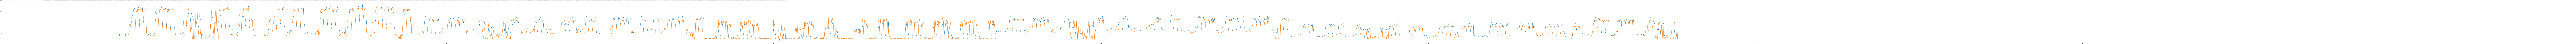

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(900,15))
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

<h1>Validation Set and Bootstrapping</h1>

In [24]:
WINDOW_SIZE = 24


df_val = pd.read_csv('Val_Paint_Data_Merged.csv')
df_val = df_val.drop(['Unnamed: 0'], axis=1)
df_val.index = pd.to_datetime(df_val['time'], format='%Y.%m.%d %H:%M:%S')
df_val.head(30)

usage_df_val = df_val

usage_df_val['Seconds'] = df_val.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year=day *365.2425

usage_df_val['Day sin'] = np.sin(usage_df_val['Seconds'] * (2*np.pi/day))
usage_df_val['Day cos'] = np.cos(usage_df_val['Seconds'] * (2*np.pi/day))
usage_df_val['Year sin'] = np.sin(usage_df_val['Seconds'] * (2*np.pi/year))
usage_df_val['Year cos'] = np.cos(usage_df_val['Seconds'] * (2*np.pi/year))

usage_df_val = usage_df_val.drop(['Seconds'], axis =1)
usage_df_val = usage_df_val.loc[usage_df_val['metric'].isin(meters)]

#make dummy variables for the values in column 'metric'
usage_df_val = pd.get_dummies(usage_df_val, columns=['metric'])
#Drop 'time' column
usage_df_val = usage_df_val.drop(['time'], axis = 1)

preds = []
acts = []

start_point = 100

for i in range(24*7):
    bootstrap_x = np.expand_dims(usage_df_val.to_numpy()[i + start_point :i + start_point + WINDOW_SIZE], 0)
    #print(bootstrap_x)
    pred_y = postprocess_output(model.predict(preprocess(bootstrap_x)))[0][0]
    act_y = usage_df_val.to_numpy()[start_point + i+WINDOW_SIZE][0]
    usage_df_val.iloc[start_point + i+WINDOW_SIZE, 0] = pred_y
    
    preds.append(pred_y)
    acts.append(act_y)
    
    
    #print(pred_y)
    #print(act_y)
    #print('--------')

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 24ms/step


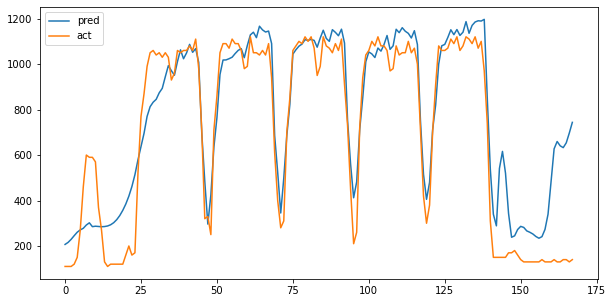

In [25]:
import matplotlib.pyplot as plt

val_results=pd.DataFrame(data={'Train Predictions':preds, 'Actuals': acts})


plt.figure(figsize=(10,5))
plt.plot(val_results['Train Predictions'], label='pred')
plt.plot(val_results['Actuals'], label='act')
plt.legend(loc="upper left")


In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(acts, preds, squared=False)

172.32470411064006

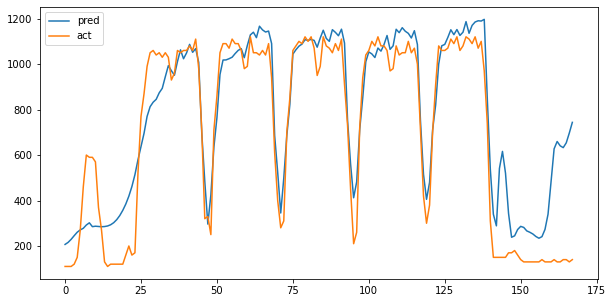

In [27]:
import matplotlib.pyplot as plt

val_results=pd.DataFrame(data={'Train Predictions':preds, 'Actuals': acts})


plt.figure(figsize=(10,5))
plt.plot(val_results['Train Predictions'], label='pred')
plt.plot(val_results['Actuals'], label='act')
plt.legend(loc="upper left")
